In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import pydot
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv("J:/501/Test/test 1/data.txt", sep=";")
df_train.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
DATA_TYPE                        96605 non-null object
POLICY_ID                        96605 non-null int64
POLICY_BEGIN_MONTH               96605 non-null int64
POLICY_END_MONTH                 96605 non-null int64
POLICY_IS_RENEWED                96605 non-null int64
POLICY_SALES_CHANNEL             96605 non-null int64
POLICY_SALES_CHANNEL_GROUP       96605 non-null int64
POLICY_BRANCH                    96605 non-null object
POLICY_MIN_AGE                   96605 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    96605 non-null int64
VEHICLE_MAKE                     96605 non-null object
VEHICLE_MODEL                    96605 non-null object
VEHICLE_ENGINE_POWER             96605 non-null float64
VEHICLE_IN_CREDIT                96605 non-null int64
VEHICLE_SUM_INSURED              96605 non-null float64
POLICY_INTERMEDIARY              96605 non-null object
INSURER_GENDER    

In [4]:
df_train = df_train.set_index(['DATA_TYPE']).sort_index()

In [5]:
df_train.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,1S,0,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,N,0,1,0,0.0,0,0,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,0,0,1,0,0.0,0,3,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,0,0,0,0,0.0,0,2,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,0,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [6]:
df_test = df_train.loc['TEST ']

In [7]:
df_train = df_train.loc['TRAIN']

In [9]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77407 entries, TRAIN to TRAIN
Data columns (total 29 columns):
POLICY_ID                        77407 non-null int64
POLICY_BEGIN_MONTH               77407 non-null int64
POLICY_END_MONTH                 77407 non-null int64
POLICY_IS_RENEWED                77407 non-null int64
POLICY_SALES_CHANNEL             77407 non-null int64
POLICY_SALES_CHANNEL_GROUP       77407 non-null int64
POLICY_BRANCH                    77407 non-null object
POLICY_MIN_AGE                   77407 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    77407 non-null int64
VEHICLE_MAKE                     77407 non-null object
VEHICLE_MODEL                    77407 non-null object
VEHICLE_ENGINE_POWER             77407 non-null float64
VEHICLE_IN_CREDIT                77407 non-null int64
VEHICLE_SUM_INSURED              77407 non-null float64
POLICY_INTERMEDIARY              77407 non-null object
INSURER_GENDER                   77407 non-null object
POLICY_CLM_N       

(None, None)

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df_train.POLICY_BRANCH.drop_duplicates()) 
dicts['POLICY_BRANCH'] = list(label.classes_)
df_train.POLICY_BRANCH = label.transform(df_train.POLICY_BRANCH)  

label.fit(df_train.VEHICLE_MAKE.drop_duplicates()) 
dicts['VEHICLE_MAKE'] = list(label.classes_)
df_train.VEHICLE_MAKE = label.transform(df_train.VEHICLE_MAKE)

In [16]:
label = LabelEncoder()
dicts = {}

label.fit(df_train.VEHICLE_MODEL.drop_duplicates()) 
dicts['VEHICLE_MODEL'] = list(label.classes_)
df_train.VEHICLE_MODEL = label.transform(df_train.VEHICLE_MODEL)  

label.fit(df_train.POLICY_INTERMEDIARY.drop_duplicates()) 
dicts['POLICY_INTERMEDIARY'] = list(label.classes_)
df_train.POLICY_INTERMEDIARY = label.transform(df_train.POLICY_INTERMEDIARY)

In [20]:
label = LabelEncoder()
dicts = {}

label.fit(df_train.INSURER_GENDER.drop_duplicates()) 
dicts['INSURER_GENDER'] = list(label.classes_)
df_train.INSURER_GENDER = label.transform(df_train.INSURER_GENDER)  

label.fit(df_train.POLICY_CLM_N.drop_duplicates()) 
dicts['POLICY_CLM_N'] = list(label.classes_)
df_train.POLICY_CLM_N = label.transform(df_train.POLICY_CLM_N)

In [21]:
label = LabelEncoder()
dicts = {}

label.fit(df_train.POLICY_CLM_GLT_N.drop_duplicates()) 
dicts['POLICY_CLM_GLT_N'] = list(label.classes_)
df_train.POLICY_CLM_GLT_N = label.transform(df_train.POLICY_CLM_GLT_N)  

label.fit(df_train.POLICY_PRV_CLM_GLT_N.drop_duplicates()) 
dicts['POLICY_PRV_CLM_GLT_N'] = list(label.classes_)
df_train.POLICY_PRV_CLM_GLT_N = label.transform(df_train.POLICY_PRV_CLM_GLT_N  

In [25]:
label = LabelEncoder()
dicts = {}

label.fit(df_train.CLIENT_REGISTRATION_REGION.drop_duplicates()) 
dicts['CLIENT_REGISTRATION_REGION'] = list(label.classes_)
df_train.CLIENT_REGISTRATION_REGION = label.transform(df_train.CLIENT_REGISTRATION_REGION)  

label.fit(df_train.POLICY_YEARS_RENEWED_N.drop_duplicates()) 
dicts['POLICY_YEARS_RENEWED_N'] = list(label.classes_)
df_train.POLICY_YEARS_RENEWED_N = label.transform(df_train.POLICY_YEARS_RENEWED_N)

In [28]:
label = LabelEncoder()
dicts = {}

label.fit(df_train.POLICY_PRV_CLM_N.drop_duplicates()) 
dicts['POLICY_PRV_CLM_N'] = list(label.classes_)
df_train.POLICY_PRV_CLM_N = label.transform(df_train.POLICY_PRV_CLM_N)  

In [29]:
df_train.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TRAIN,63278,5,5,1,55,6,0,26,8,53,...,0,0,1,0,0.0,0,4,5000.0,41,-0.35
TRAIN,67901,9,9,0,55,6,0,37,10,48,...,0,0,1,0,0.0,0,1,0.0,40,-0.10
TRAIN,63433,8,8,0,52,6,1,52,33,53,...,0,0,1,0,0.0,0,3,0.0,35,-0.49
TRAIN,63966,6,5,1,4,4,1,36,14,4,...,2,0,1,0,2.0,0,4,0.0,56,-0.19
TRAIN,63348,9,9,1,2,4,1,25,6,59,...,0,1,1,0,0.0,0,1,15000.0,56,0.14


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77407 entries, TRAIN to TRAIN
Data columns (total 29 columns):
POLICY_ID                        77407 non-null int64
POLICY_BEGIN_MONTH               77407 non-null int64
POLICY_END_MONTH                 77407 non-null int64
POLICY_IS_RENEWED                77407 non-null int64
POLICY_SALES_CHANNEL             77407 non-null int64
POLICY_SALES_CHANNEL_GROUP       77407 non-null int64
POLICY_BRANCH                    77407 non-null int64
POLICY_MIN_AGE                   77407 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    77407 non-null int64
VEHICLE_MAKE                     77407 non-null int64
VEHICLE_MODEL                    77407 non-null int64
VEHICLE_ENGINE_POWER             77407 non-null float64
VEHICLE_IN_CREDIT                77407 non-null int64
VEHICLE_SUM_INSURED              77407 non-null float64
POLICY_INTERMEDIARY              77407 non-null int64
INSURER_GENDER                   77407 non-null int64
POLICY_CLM_N            

In [32]:
target = df_train['POLICY_IS_RENEWED']

In [33]:
df_train.drop(['POLICY_IS_RENEWED'], axis=1, inplace=True)
df_train.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TRAIN,63278,5,5,55,6,0,26,8,53,177,...,0,0,1,0,0.0,0,4,5000.0,41,-0.35
TRAIN,67901,9,9,55,6,0,37,10,48,80,...,0,0,1,0,0.0,0,1,0.0,40,-0.10
TRAIN,63433,8,8,52,6,1,52,33,53,177,...,0,0,1,0,0.0,0,3,0.0,35,-0.49
TRAIN,63966,6,5,4,4,1,36,14,4,490,...,2,0,1,0,2.0,0,4,0.0,56,-0.19
TRAIN,63348,9,9,2,4,1,25,6,59,329,...,0,1,1,0,0.0,0,1,15000.0,56,0.14


In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df_train.values, target, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train), knn.fit(X_train, y_train)

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=17, splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=10, p=2,
            weights='uniform'))

In [37]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) 

0.68470912457477495

In [38]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.55595745597037416

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [40]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,25)}

In [41]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [42]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [43]:
tree_grid.best_params_

{'max_depth': 8, 'max_features': 24}

In [44]:
tree_grid.best_score_

0.70024361435109994

In [45]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.69504370667011151

In [46]:
tuned_tree = DecisionTreeClassifier(max_depth=8, max_features=24, random_state=17)

In [47]:
tuned_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=24, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [49]:
tuned_tree_pred = tuned_tree.predict(X_holdout)
accuracy_score(y_holdout, tuned_tree_pred) 

0.69504370667011151

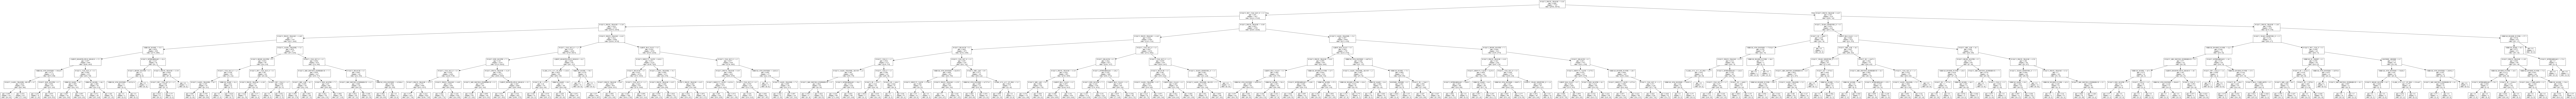

In [51]:
import os
os.environ["PATH"] += os.pathsep + 'J:/HiEnd/StandAloneComplex/Library/bin/graphviz'

from sklearn.tree import DecisionTreeClassifier
tuned_tree = DecisionTreeClassifier(max_depth=8, max_features=24, random_state=17)
tuned_tree.fit(df_train, target)

from sklearn import tree
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(tuned_tree, feature_names=df_train.columns.values, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('df_train_tuned_test.pdf') 
graph.write_png('df_train_tuned_test.png') 
Image(graph.create_png()) 

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.710117318234


In [58]:
forest_params = {'max_depth': range(1,8),
'max_features': range(1,24)}

In [59]:
forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

In [60]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 161 candidates, totalling 805 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 805 out of 805 | elapsed: 32.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=17,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 8), 'max_features': range(1, 24)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [61]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 7, 'max_features': 23}, 0.70627860623062155)

In [64]:
forest_grid_pred = forest_grid.predict(X_holdout)
accuracy_score(y_holdout, forest_grid_pred) 

0.70615338242259829

In [ ]:
Похоже я был не прав когда утвреждал, что признак POLICY_COURT_SIGN являеться определяющим. Небольшой плюс в точность и 
такой лютый фейл. Обидно. Вероятно тогда моя селекция признаков в части предсказания POLICY_IS_RENEWED была местами не верна.